In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kokki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv(
    r"C:\Users\kokki\Downloads\trainingandtestdata\training.1600000.processed.noemoticon.csv",
    encoding='latin-1',
    names=['target','ids','date','flag','user','text'],
    usecols=['target','text']
)


In [4]:
df['target'] = pd.to_numeric(df['target'], errors='coerce')
df = df[df['target'].isin([0, 4])]
df['target'] = df['target'].replace({0: 0, 4: 1})
df.dropna(inplace=True)


In [5]:
df = df.sample(50000, random_state=42)


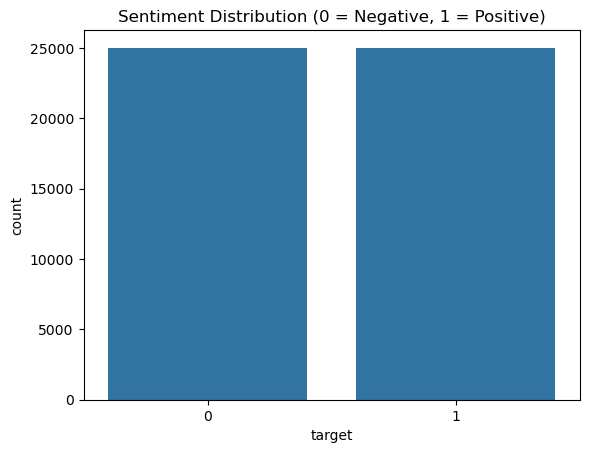

In [6]:
sns.countplot(x=df['target'])
plt.title("Sentiment Distribution (0 = Negative, 1 = Positive)")
plt.show()


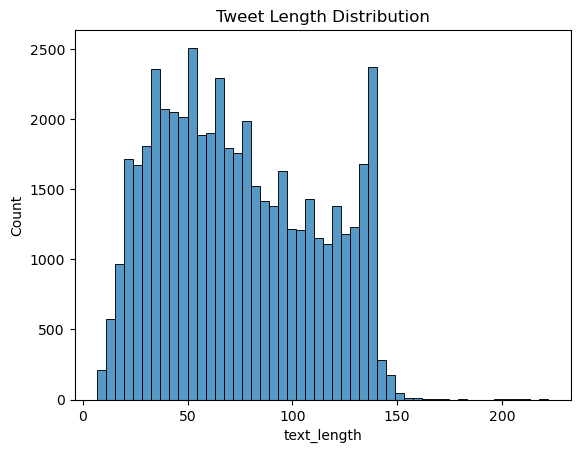

In [7]:
df['text_length'] = df['text'].apply(len)
sns.histplot(df['text_length'], bins=50)
plt.title("Tweet Length Distribution")
plt.show()


In [8]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+|#\w+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = text.split()
    tokens = [stemmer.stem(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(clean_text)


In [9]:
train_df = pd.read_csv(
    r"C:\Users\kokki\Downloads\trainingandtestdata\training.1600000.processed.noemoticon.csv",
    encoding='latin-1',
    names=['target','ids','date','flag','user','text'],
    usecols=['target','text']
)

train_df['target'] = train_df['target'].replace({0: 0, 4: 1})
train_df = train_df[train_df['target'].isin([0,1])]


In [10]:
test_df = pd.read_csv(
    r"C:\Users\kokki\Downloads\trainingandtestdata\testdata.manual.2009.06.14.csv",
    encoding='latin-1',
    names=['target','ids','date','flag','user','text'],
    usecols=['target','text']
)

test_df['target'] = test_df['target'].replace({0: 0, 4: 1})
test_df = test_df[test_df['target'].isin([0,1])]


In [11]:
train_df['clean_text'] = train_df['text'].apply(clean_text)
test_df['clean_text'] = test_df['text'].apply(clean_text)

X_train = train_df['clean_text']
y_train = train_df['target']

X_test = test_df['clean_text']
y_test = test_df['target']


In [12]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+|#\w+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = text.split()
    tokens = [stemmer.stem(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)


In [13]:
train_df['clean_text'] = train_df['text'].apply(clean_text)
test_df['clean_text'] = test_df['text'].apply(clean_text)


In [14]:
X_train = train_df['clean_text']
y_train = train_df['target']

X_test = test_df['clean_text']
y_test = test_df['target']


In [15]:
vectorizer = CountVectorizer(max_features=3000)
X_train_bow = vectorizer.fit_transform(X_train)   
X_test_bow = vectorizer.transform(X_test)         


In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_bow, y_train)
knn_pred = knn.predict(X_test_bow)


In [17]:
dt = DecisionTreeClassifier(max_depth=20)
dt.fit(X_train_bow, y_train)
dt_pred = dt.predict(X_test_bow)


In [20]:
svm = LinearSVC()
svm.fit(X_train_bow, y_train)
svm_pred = svm.predict(X_test_bow)


In [21]:
def evaluate(name, y_true, y_pred):
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))

evaluate("KNN", y_test, knn_pred)
evaluate("Decision Tree", y_test, dt_pred)
evaluate("SVM", y_test, svm_pred)



KNN
Accuracy: 0.6908077994428969
[[103  74]
 [ 37 145]]
              precision    recall  f1-score   support

           0       0.74      0.58      0.65       177
           1       0.66      0.80      0.72       182

    accuracy                           0.69       359
   macro avg       0.70      0.69      0.69       359
weighted avg       0.70      0.69      0.69       359


Decision Tree
Accuracy: 0.6128133704735376
[[ 54 123]
 [ 16 166]]
              precision    recall  f1-score   support

           0       0.77      0.31      0.44       177
           1       0.57      0.91      0.70       182

    accuracy                           0.61       359
   macro avg       0.67      0.61      0.57       359
weighted avg       0.67      0.61      0.57       359


SVM
Accuracy: 0.7994428969359332
[[132  45]
 [ 27 155]]
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       177
           1       0.78      0.85      0.81       182

 

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)


In [24]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=100)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding,
    Conv1D,
    MaxPooling1D,
    Dense,
    Flatten,
    Dropout
)


In [27]:
cnn = Sequential([
    Embedding(10000, 128, input_length=100),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


C:\Users\kokki\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [28]:
cnn.fit(
    X_train_pad,
    y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.2
)



Epoch 1/5
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 471s 47ms/step - accuracy: 0.7896 - loss: 0.4504 - val_accuracy: 0.6900 - val_loss: 0.6272
Epoch 2/5
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 451s 45ms/step - accuracy: 0.8073 - loss: 0.4202 - val_accuracy: 0.6858 - val_loss: 0.5992
Epoch 3/5
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 456s 46ms/step - accuracy: 0.8192 - loss: 0.3979 - val_accuracy: 0.6489 - val_loss: 0.6790
Epoch 4/5
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 462s 46ms/step - accuracy: 0.8320 - loss: 0.3728 - val_accuracy: 0.6600 - val_loss: 0.6747
Epoch 5/5
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 429s 43ms/step - accuracy: 0.8456 - loss: 0.3456 - val_accuracy: 0.6454 - val_loss: 0.7549


In [ ]:
cnn_pred = (cnn.predict(X_test_pad) > 0.5).astype(int)

print("CNN Accuracy:", accuracy_score(y_test, cnn_pred))
print(confusion_matrix(y_test, cnn_pred))
print(classification_report(y_test, cnn_pred))


In [ ]:
cnn.save("cnn_sentiment.h5")

with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)
